In [5]:
# Necessary imports in general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 : Extraction of RSS Flow

## Getting the list of files' name

In [2]:
import os
# adapt path name 
path = "data_pour_TD_final/"
avis_list = os.listdir(path+"avis")
alert_list = os.listdir(path+"alertes")
mitre_list = os.listdir(path+"mitre")
first_list = os.listdir(path+"first")

In [3]:
# will list all dictionnaries in this list because it's cheaper than growing the data frame
cve_list = []

## Get the information for avis

In [6]:
for avis_id in avis_list:
    with open(path+"avis/"+avis_id, 'r') as f:
        data = json.load(f)
        for cve in data["cves"]:
            # basic info
            cve_id = cve['name']
            dico = {
                'id': avis_id,
                'title': '',
                'type': 'Avis',
                'publication_date': None,
                'cve_id': cve_id,
                'original_link': None,
                'epss' : np.nan,
                'description': None,
                'cwe': 'Non disponible',
                'cwe_desc' : 'Non disponible',
                'vendor': [],
                'product': [],
                'affected_versions': [],
                'cvss': np.nan,
                'severity': None
            }
            # other info from avis
            if data['vendor_advisories'] and 'title' in data['vendor_advisories'][0]:
                dico['title'] = data['vendor_advisories'][0]['title']
            if data['vendor_advisories'] and 'published_at' in data['vendor_advisories'][0]:
                dico['publication_date'] = data['vendor_advisories'][0]['published_at']
            if data['vendor_advisories'] and 'url' in data['vendor_advisories'][0]:
                dico['original_link'] = data['vendor_advisories'][0]['url']
            # info from first
            if cve_id in first_list:
                with open(path+"first/"+cve_id, 'r') as f1:
                    data_first = json.load(f1)
                    if data_first['data'] and 'epss' in data_first['data'][0]:
                        dico['epss'] = data_first['data'][0]['epss']
                    
            # info from mitre
            if cve_id in mitre_list :
                with open(path+"mitre/"+cve_id, 'r') as f2:
                    data_mitre = json.load(f2)
                    if 'containers' in data_mitre.keys() and 'descriptions' in data_mitre['containers']['cna'].keys():
                        dico['description'] = data_mitre['containers']['cna']['descriptions'][0]['value']
    
                        # getting cwe
                        problemtype = data_mitre["containers"]["cna"].get("problemTypes", {})
                        if problemtype and "descriptions" in problemtype[0].keys(): 
                            dico['cwe'] = problemtype[0]["descriptions"][0].get("cweId", "Non disponible") 
                            dico['cwe_desc']=problemtype[0]["descriptions"][0].get("description", "Non disponible")
    
                        # getting affected products
                        affected = data_mitre['containers']['cna']['affected']
                        for product in affected:
                            if 'vendor' in product.keys() and product['vendor'] not in dico['vendor']:
                                dico['vendor'].append(product['vendor'])
                            if 'product' in product.keys() and product['product'] not in dico['product']:
                                dico['product'].append(product['product'])
                            if 'versions' in product:
                                dico['affected_versions'] = [v["version"] for v in product["versions"] if v["status"] == "affected"]
    
                        # getting cvss score and severity
                        keys = ['cvssV3_0', 'cvssV3_1', 'cvssV2', 'cvssV4_0']
                        if 'metrics' in data_mitre['containers']['cna'].keys():
                            cvss_info = data_mitre['containers']['cna']['metrics'][0]
                            for key in keys :
                                if key in cvss_info.keys():
                                    dico['cvss'] = cvss_info[key]['baseScore']
                                    dico['severity'] = cvss_info[key]['baseSeverity']
            cve_list.append(dico)
                            

            

## Get the information for alertes

In [7]:
for alert_id in alert_list:
    with open(path+"alertes/"+alert_id, 'r') as f:
        data = json.load(f)
        for cve in data["cves"]:
            # basic info
            cve_id = cve['name']
            dico = {
                'id': alert_id,
                'title': '',
                'type': 'Alerte',
                'publication_date': None,
                'cve_id': cve_id,
                'original_link': None,
                'epss' : np.nan,
                'description': None,
                'cwe': 'Non disponible',
                'cwe_desc' : 'Non disponible',
                'vendor': [],
                'product': [],
                'affected_versions': [],
                'cvss': np.nan,
                'severity': None
            }
            # other info from avis
            if data['vendor_advisories'] and 'title' in data['vendor_advisories'][0]:
                dico['title'] = data['vendor_advisories'][0]['title']
            if data['vendor_advisories'] and 'published_at' in data['vendor_advisories'][0]:
                dico['publication_date'] = data['vendor_advisories'][0]['published_at']
            if data['vendor_advisories'] and 'url' in data['vendor_advisories'][0]:
                dico['original_link'] = data['vendor_advisories'][0]['url']
            # info from first
            if cve_id in first_list:
                with open(path+"first/"+cve_id, 'r') as f1:
                    data_first = json.load(f1)
                    if data_first['data'] and 'epss' in data_first['data'][0]:
                        dico['epss'] = data_first['data'][0]['epss']
                    
            # info from mitre
            if cve_id in mitre_list :
                with open(path+"mitre/"+cve_id, 'r') as f2:
                    data_mitre = json.load(f2)
                    if 'containers' in data_mitre.keys() and 'descriptions' in data_mitre['containers']['cna'].keys():
                        dico['description'] = data_mitre['containers']['cna']['descriptions'][0]['value']
    
                        # getting cwe
                        problemtype = data_mitre["containers"]["cna"].get("problemTypes", {})
                        if problemtype and "descriptions" in problemtype[0].keys(): 
                            dico['cwe'] = problemtype[0]["descriptions"][0].get("cweId", "Non disponible") 
                            dico['cwe_desc']=problemtype[0]["descriptions"][0].get("description", "Non disponible")
    
                        # getting affected products
                        affected = data_mitre['containers']['cna']['affected']
                        for product in affected:
                            if 'vendor' in product.keys() and product['vendor'] not in dico['vendor']:
                                dico['vendor'].append(product['vendor'])
                            if 'product' in product.keys() and product['product'] not in dico['product']:
                                dico['product'].append(product['product'])
                            if 'versions' in product:
                                dico['affected_versions'] = [v["version"] for v in product["versions"] if v["status"] == "affected"]
    
                        # getting cvss score and severity
                        keys = ['cvssV3_0', 'cvssV3_1', 'cvssV2', 'cvssV4_0']
                        if 'metrics' in data_mitre['containers']['cna'].keys():
                            cvss_info = data_mitre['containers']['cna']['metrics'][0]
                            for key in keys :
                                if key in cvss_info.keys():
                                    dico['cvss'] = cvss_info[key]['baseScore']
                                    dico['severity'] = cvss_info[key]['baseSeverity']
            cve_list.append(dico)
                            

            

In [8]:
df = pd.DataFrame(cve_list)
df.head

<bound method NDFrame.head of                          id  \
0      CERTFR-2023-AVI-0001   
1      CERTFR-2023-AVI-0002   
2      CERTFR-2023-AVI-0002   
3      CERTFR-2023-AVI-0002   
4      CERTFR-2023-AVI-0002   
...                     ...   
60794   CERTFR-2025-ALE-005   
60795   CERTFR-2025-ALE-006   
60796   CERTFR-2025-ALE-007   
60797   CERTFR-2025-ALE-007   
60798   CERTFR-2025-ALE-008   

                                                   title    type  \
0      Bulletin de sécurité Apache 9.0.69 du 14 novem...    Avis   
1      Bulletin de sécurité Fortinet FG-IR-22-250 du ...    Avis   
2      Bulletin de sécurité Fortinet FG-IR-22-250 du ...    Avis   
3      Bulletin de sécurité Fortinet FG-IR-22-250 du ...    Avis   
4      Bulletin de sécurité Fortinet FG-IR-22-250 du ...    Avis   
...                                                  ...     ...   
60794                Bulletin de sécurité SAP april-2025  Alerte   
60795         Bulletin de sécurité Fortinet FG-IR-25-

In [9]:
df.columns

Index(['id', 'title', 'type', 'publication_date', 'cve_id', 'original_link',
       'epss', 'description', 'cwe', 'cwe_desc', 'vendor', 'product',
       'affected_versions', 'cvss', 'severity'],
      dtype='object')

In [234]:
df[10377:11000]

,id,title,type,publication_date,cve_id,original_link,epss,description,cwe,cwe_desc,vendor,product,affected_versions,cvss,severity
10377,CERTFR-2023-AVI-0925,Bulletin de sécurité SUSE SUSE-SU-2023:4072-2 ...,Avis,None,CVE-2023-4155,https://www.suse.com/support/update/announceme...,0.000430000,A flaw was found in KVM AMD Secure Encrypted V...,CWE-367,Time-of-check Time-of-use (TOCTOU) Race Condition,"[n/a, Red Hat, Red Hat, Red Hat, Red Hat, Red ...","[kernel, Red Hat Enterprise Linux 6, Red Hat E...",[],NaN,None
10378,CERTFR-2023-AVI-0925,Bulletin de sécurité SUSE SUSE-SU-2023:4072-2 ...,Avis,None,CVE-2023-4622,https://www.suse.com/support/update/announceme...,0.000420000,A use-after-free vulnerability in the Linux ke...,CWE-416,CWE-416 Use After Free,[Linux],[Kernel],[4.2],7.8,HIGH
10379,CERTFR-2023-AVI-0925,Bulletin de sécurité SUSE SUSE-SU-2023:4072-2 ...,Avis,None,CVE-2023-39192,https://www.suse.com/support/update/announceme...,0.000090000,A flaw was found in the Netfilter subsystem in...,CWE-125,Out-of-bounds Read,"[Red Hat, Red Hat, Red Hat, Red Hat, Red Hat, ...","[Red Hat Enterprise Linux 8, Red Hat Enterpris...",[],NaN,None
10380,CERTFR-2023-AVI-0925,Bulletin de sécurité SUSE SUSE-SU-2023:4072-2 ...,Avis,None,CVE-2023-39191,https://www.suse.com/support/update/announceme...,0.004210000,An improper input validation flaw was found in...,CWE-20,Improper Input Validation,"[Red Hat, Red Hat, Red Hat, Red Hat, Red Hat, ...","[Red Hat Enterprise Linux 9, Red Hat Enterpris...",[],NaN,None
10381,CERTFR-2023-AVI-0925,Bulletin de sécurité SUSE SUSE-SU-2023:4072-2 ...,Avis,None,CVE-2023-39194,https://www.suse.com/support/update/announceme...,0.003980000,A flaw was found in the XFRM subsystem in the ...,CWE-125,Out-of-bounds Read,"[Red Hat, Red Hat, Red Hat, Red Hat, Red Hat, ...","[Red Hat Enterprise Linux 8, Red Hat Enterpris...",[],NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,CERTFR-2023-AVI-0976,Bulletin de sécurité IBM 7080118 du 20 novembr...,Avis,None,CVE-2020-10735,https://www.ibm.com/support/pages/node/7080118,0.004930000,A flaw was found in python. In algorithms with...,Non disponible,DoS,[n/a],[python],[python 3.7],NaN,None
10996,CERTFR-2023-AVI-0976,Bulletin de sécurité IBM 7080118 du 20 novembr...,Avis,None,CVE-2023-44487,https://www.ibm.com/support/pages/node/7080118,0.944340000,The HTTP/2 protocol allows a denial of service...,Non disponible,n/a,[n/a],[n/a],[n/a],NaN,None
10997,CERTFR-2023-AVI-0976,Bulletin de sécurité IBM 7080118 du 20 novembr...,Avis,None,CVE-2023-26279,https://www.ibm.com/support/pages/node/7080118,NaN,None,Non disponible,Non disponible,[],[],[],NaN,None
10998,CERTFR-2023-AVI-0976,Bulletin de sécurité IBM 7080118 du 20 novembr...,Avis,None,CVE-2022-40153,https://www.ibm.com/support/pages/node/7080118,NaN,None,Non disponible,Non disponible,[],[],[],NaN,None


# Step 5 : Interpretation & Visualisation

## Diagramme circulaire des types de vulnérabilités (CWE)

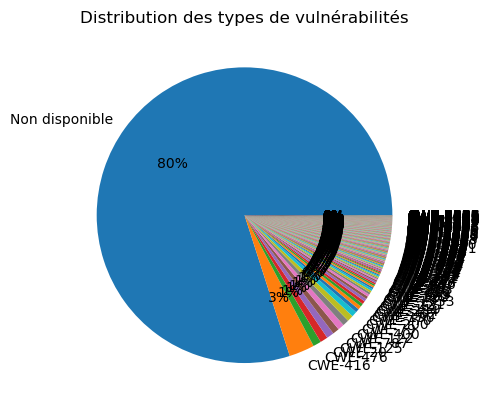

In [25]:
effectif = df['cwe'].value_counts()
graph = plt.pie(effectif, labels=effectif.index, autopct="%0.0f%%")
plt.title("Distribution des types de vulnérabilités")
plt.show()

## Heatmap des corrélations entre CVSS et EPSS

In [ ]:

cvss_epss = df.pivot(index='cvss', columns='epss', values='value')
